## Exploratory Data Analysis
Without further ado, let's get started by first understanding the data we have.
Let's import the needed libraries and define the paths to our training and test csv.

In [70]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import ast

# To write strings with double quotes
import json

# Metric for our competition
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

def msle_score(y, preds):
    return np.sqrt(mean_squared_log_error(y, preds))

folders = ["..", "input", "tmdb-box-office-prediction"]
train_file = "train.csv"
test_file = "test.csv"

train_path = os.path.join(*folders, train_file)
test_path = os.path.join(*folders, test_file)

### Preliminary considerations
If we open the file with any text editor, we can see that we have a datetime feature: *release_date*. What we are going to do is we are parsing it directly as datetime. Furthermore, we are going to read the csv with the "utf-8" encoding.

Let's import our csv into pandas dataframes

In [71]:
train_df = pd.read_csv(train_path, parse_dates=["release_date"])
test_df = pd.read_csv(test_path, parse_dates=["release_date"])

### Data Visualization
Now, let's view the first 10 rows of both our train and test dataframes.

In [72]:
with pd.option_context("display.max_columns", None):
    display(train_df.head(10))
    display(test_df.head(10))

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,1987-08-06,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-08-30,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."
5,3006,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0120238,en,SubUrbia,A group of suburban teenagers try to support e...,8.679350,/7PdRbG09K9JHYyOwwCSn3OdJb0N.jpg,"[{'name': 'Castle Rock Entertainment', 'id': 9...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-02-07,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,SubUrbia,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 4, 'character': 'Pony', 'credit_i...","[{'credit_id': '52fe4576c3a368484e05c901', 'de..."
6,3007,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,tt1517177,de,Drei,Hanna and Simon are in a 20 year marriage with...,4.898882,/cIIQJvsZePyYYjlQJMU3J0fcinu.jpg,"[{'name': 'X-Filme Creative Pool', 'id':

We can see that several features have lists of dictionaries: we will need to parse them appropriately into string formats and do our transformations with them.

We can also notice that some features (*id*, *imdb_id*, *homepage*, etc) will be irrelevant in our predictive model as they obviously don't bring any information correlated to the relative movie's revenue.

#### Response variable distribution
Let's plot the response variable *revenue* distribution to see its range of values.

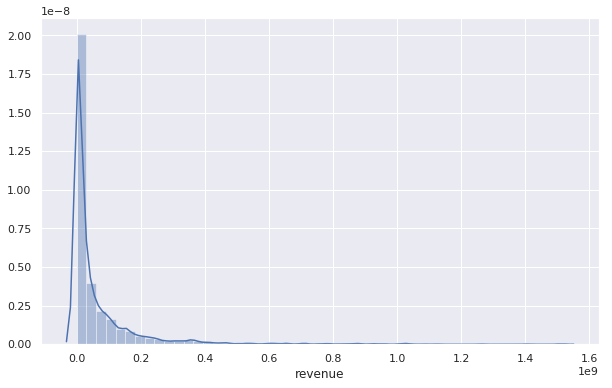

In [73]:
plt.figure(figsize=(10, 6))
sns.distplot(train_df["revenue"])

#### Relationship of numerical features with the response
Let's plot the relationship between each numerical feature and the response. To do so, we first select all the numerical columns (from the test_df data, so we don't select the response itself), and we plot them against the response.

<Figure size 360x360 with 0 Axes>

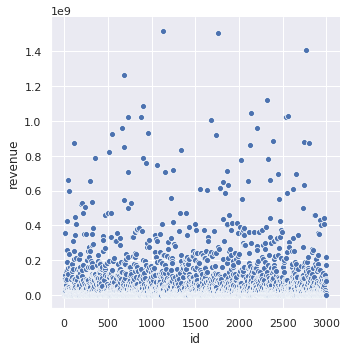

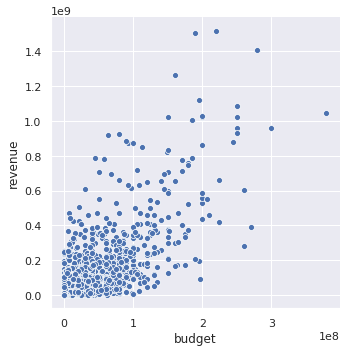

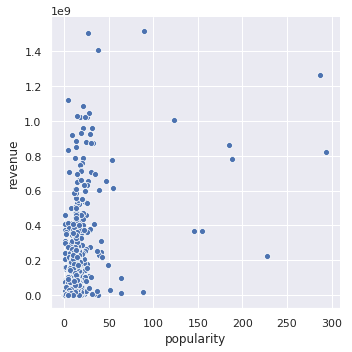

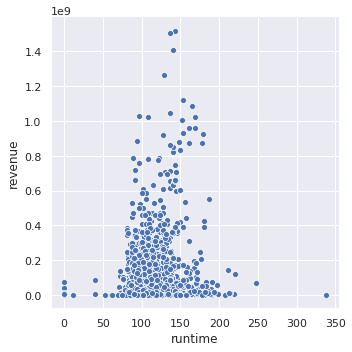

In [74]:
num_cols = test_df.select_dtypes("number").columns

plt.figure(figsize=(5, 5))
for feat in num_cols:
    sns.relplot(x=feat, y="revenue", data=train_df)

Apart from *id*, which is clearly uncorrelated with *revenue*, we can see some sort of correlation between the variables and the response. To better analyze it, we will plot a correlation heatmap.

Before doing it, we will remove the columns we said aren't useful or beneficial for our prediction purposes. In order to remove it after we have explored our data, we would like to store all the columns that will later be removed in a list.

In [75]:
cols_to_rm = ["id", "homepage", "imdb_id", "original_title", "overview", "poster_path", "tagline", "title"]

Now let's calculate the correlation matrix using pandas built-in method.

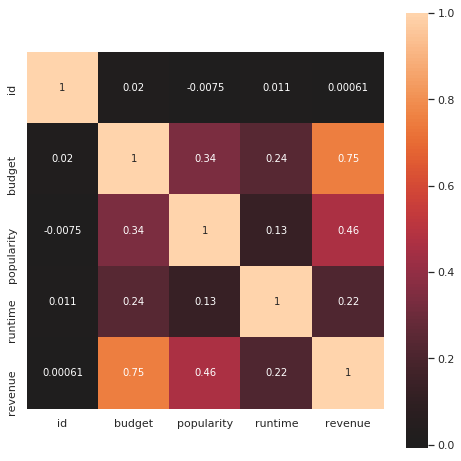

In [76]:
# We calculate numerical columns, including the response this time
num_cols = train_df.select_dtypes("number").columns

num_corr = train_df[num_cols].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(num_corr, annot=True, center=0, square=True)

Surprisingly, *popularity* is not very correlated to the response and *runtime* is weakly correlated. On the contrary, what contributes the most to the revenue of a movie is the budget invested. Indeed, *budget* is strongly correlated with *revenue*.

We don't see any strong correlation between predictors themselves, so we don't risk to incur in **Multicollinearity**.

Let's see if we can see temporal trends in the data by plotting the revenue according to the release_date, not only as year but also as day of the week and month. In this way, we can spot temporal trends that can help us better understand how the response vary according to time.

<Figure size 360x360 with 0 Axes>

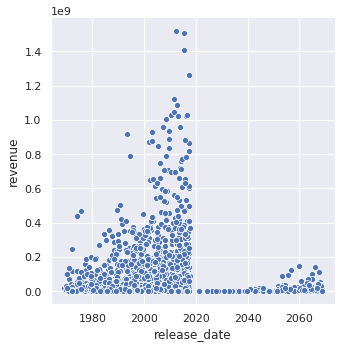

In [77]:
sns.set()
plt.figure(figsize=(5, 5))
sns.relplot(x="release_date", y="revenue", data=train_df)

There are no yearly trends as we can see. However, we can see that there are movies who refer to a later date than the one this dataset was created. Let's see the movies whose date is after the dataset creation are there.

In [78]:
ds_date = pd.to_datetime("2/6/2019")

later_movies = train_df[train_df["release_date"] > ds_date]

with pd.option_context("display.max_columns", None):
    display(later_movies.head(5))

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,/bwLMwKun3RNn9rmcfMfJw11ofNh.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",2065-04-07,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,/vDwphkloD7ToaDpKASAXGgHOclN.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2067-06-22,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2065-07-01,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,/tAExVSQUlby56ATBlMnA2BrbA25.jpg,"[{'name': 'Joanna Productions', 'id': 5799}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2056-05-30,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,/gQg6sPYfNTUlf8wEtydzWl09RyR.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2062-12-25,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",13129846


We can see that the release date of these movies has actually been parsed in a wrong way, and it's wrong indeed. We can remove *release_date* if we see that it doesn't contribute to our final prediction.

Before doing that, let's check if there are monthly or weekly trends.

<Figure size 360x360 with 0 Axes>

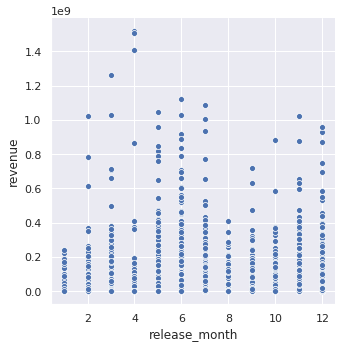

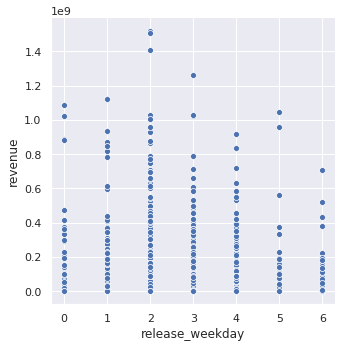

In [79]:
month_df = train_df[["revenue"]].copy()
month_df["release_month"] = train_df["release_date"].map(lambda m: m.month)

week_df = train_df[["revenue"]].copy()
week_df["release_weekday"] = train_df["release_date"].map(lambda m: m.dayofweek)

sns.set()
plt.figure(figsize=(5, 5))
sns.relplot(x="release_month", y="revenue", data=month_df)
sns.relplot(x="release_weekday", y="revenue", data=week_df)

As we can see, there are no temporal trends. Therefore we can mark *release_date* for removal in a later stage.

In [80]:
cols_to_rm.append("release_date")

#### NAs percentage for each column
Before dropping columns, it would be great to check the NAs percentage for each predictor and cancel the columns mainly done of NAs.

In [81]:
na_percentages = train_df.isna().mean().round(4) * 100
display(na_percentages)

id                        0.00
belongs_to_collection    79.87
budget                    0.00
genres                    0.23
homepage                 68.47
imdb_id                   0.00
original_language         0.00
original_title            0.00
overview                  0.27
popularity                0.00
poster_path               0.03
production_companies      5.20
production_countries      1.83
release_date              0.00
runtime                   0.07
spoken_languages          0.67
status                    0.00
tagline                  19.90
title                     0.00
Keywords                  9.20
cast                      0.43
crew                      0.53
revenue                   0.00
dtype: float64

From the correlation matrix above, we can see that runtime doesn't bring any benefit so we can simply drop it.

In [82]:
cols_to_rm.append("runtime")

Let's now drop the columns.

In [83]:
train_df = train_df.drop(cols_to_rm, axis=1)
test_df = test_df.drop(cols_to_rm, axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head(5))
    display(test_df.head(5))

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew
0,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,3.851534,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...","[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,3.217680,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


#### Imputation of missing values
We'll replace categorical "NaN" with "None" while numerical NaN with the median of each column.

In [84]:
num_cols = test_df.select_dtypes("number").columns
cat_cols = train_df.select_dtypes(exclude="number").columns

train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

train_df[cat_cols] = train_df[cat_cols].fillna("None")
test_df[cat_cols] = test_df[cat_cols].fillna("None")

with pd.option_context("display.max_columns", None):
    display(train_df.head(5))
    display(test_df.head(5))

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,None,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,None,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,None,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,None,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,None,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,None,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew
0,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",ja,3.851534,None,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,None,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",en,3.559789,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,8.085194,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,None,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",fr,8.596012,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...","[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,None,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",en,3.217680,None,"[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [85]:
def parse_dict(series):
    ret_ls = []
    
    for row in series:
        if row == "None":
            ret_ls.append("None")
        else:
            ret_ls.append(json.dumps([elem["name"] for elem in ast.literal_eval(row)]))
            
    return ret_ls
        

Now let's apply it to the columns which have dicts as values.

In [86]:
dict_cols = ["genres", "production_companies", "production_countries", "spoken_languages", "Keywords", "cast", "crew"]

train_df[dict_cols] = train_df[dict_cols].apply(parse_dict)
test_df[dict_cols] = test_df[dict_cols].apply(parse_dict)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[""Comedy""]",en,6.575393,"[""Paramount Pictures"", ""United Artists"", ""Metr...","[""United States of America""]","[""English""]",Released,"[""time travel"", ""sequel"", ""hot tub"", ""duringcr...","[""Rob Corddry"", ""Craig Robinson"", ""Clark Duke""...","[""Kelly Cantley"", ""Steve Pink"", ""Josh Heald"", ...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[""Comedy"", ""Drama"", ""Family"", ""Romance""]",en,8.248895,"[""Walt Disney Pictures""]","[""United States of America""]","[""English""]",Released,"[""coronation"", ""duty"", ""marriage"", ""falling in...","[""Anne Hathaway"", ""Julie Andrews"", ""H\u221a\u0...","[""Garry Marshall"", ""Charles Minsky"", ""John Deb...",95149435
2,None,3300000,"[""Drama""]",en,64.299990,"[""Bold Films"", ""Blumhouse Productions"", ""Right...","[""United States of America""]","[""English""]",Released,"[""jazz"", ""obsession"", ""conservatory"", ""music t...","[""Miles Teller"", ""J.K. Simmons"", ""Melissa Beno...","[""Terri Taylor"", ""Richard Henderson"", ""Jeffrey...",13092000
3,None,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,"[""India""]","[""English"", ""\u0939\u093f\u0928\u094d\u0926\u0...",Released,"[""mystery"", ""bollywood"", ""police corruption"", ...","[""Vidya Balan"", ""Nawazuddin Siddiqui"", ""Paramb...","[""Sujoy Ghosh"", ""Sujoy Ghosh"", ""Sujoy Ghosh""]",16000000
4,None,0,"[""Action"", ""Thriller""]",ko,1.148070,None,"[""South Korea""]","[""\ud55c\uad6d\uc5b4/\uc870\uc120\ub9d0""]",Released,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Park Si-yeon...","[""Jong-seok Yoon"", ""Jong-seok Yoon""]",3923970


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew
0,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[""Adventure"", ""Animation"", ""Family"", ""Fantasy""]",ja,3.851534,None,"[""Japan"", ""United States of America""]","[""English"", ""\u65e5\u672c\u8a9e""]",Released,"[""pok\u221a\u00a9mon"", ""pocket monsters""]","[""Craig Blair"", ""Emily Bauer"", ""Sarah Natochen...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]"
1,None,88000,"[""Horror"", ""Science Fiction""]",en,3.559789,"[""Woolner Brothers Pictures Inc.""]","[""United States of America""]","[""English""]",Released,"[""revenge"", ""alien"", ""b movie"", ""cheating husb...","[""Allison Hayes"", ""William Hudson"", ""Yvette Vi...","[""Edward Mann"", ""Jacques R. Marquette"", ""Jacqu..."
2,None,0,"[""Comedy"", ""Romance""]",en,8.085194,"[""Warner Bros."", ""Outlaw Productions (I)"", ""Mi...","[""United States of America""]","[""English""]",Released,"[""jealousy"", ""love"", ""revenge"", ""break-up""]","[""Meg Ryan"", ""Matthew Broderick"", ""Kelly Prest...","[""Griffin Dunne"", ""Robert F. Newmyer"", ""Jeffre..."
3,None,6800000,"[""Drama"", ""War"", ""Mystery""]",fr,8.596012,"[""TS Productions"", ""Micro scope"", ""Phi Group""]","[""Canada"", ""France""]","[""Fran\u00e7ais"", ""\u0627\u0644\u0639\u0631\u0...",Released,"[""prison"", ""middle east"", ""rape"", ""muslim"", ""m...","[""Lubna Azabal"", ""M\u221a\u00a9lissa D\u221a\u...","[""Louis Craig"", ""Lucie Robitaille"", ""Gilles Sa..."
4,None,2000000,"[""History"", ""Documentary""]",en,3.217680,None,"[""United States of America""]","[""English""]",Released,"[""usa"", ""1970s"", ""sexual revolution"", ""unsimul...","[""Dennis Hopper"", ""Peter Bart"", ""Warren Beatty...","[""Brian Grazer"", ""Kim Roth"", ""Ron Howard"", ""Fe..."


### Shallowest model: mean revenue
Before developing a complex model, let's try a few shallow models to see how well they can predict. Let's first start with the mean revenue, calculated on a training set sampled randomly.

In [87]:
X = train_df.drop("revenue", axis=1)
y = train_df["revenue"]
 
_, _, y_train, y_test = train_test_split(X, y, test_size=0.3)

mean_revenue = y_train.mean() * np.ones(len(y_test))

print(msle_score(y_test, mean_revenue))

3.4736903196377393


As we can see, we got a pretty high error. Let us see if we fit a linear regression model using only *budget* as predictor.

### Linear regression with Budget as the only predictor
Let's use linear regression with just one predictor that is *budget*.

In [88]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)

X = train_df["budget"].values.reshape(-1, 1)
y = train_df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr.fit(X_train, y_train)

print("R2 score is:", lr.score(X_test, y_test))
print("Intercept is %.2f and coefficient of budget is %.2f" % (lr.intercept_, lr.coef_))

preds = lr.predict(X_test)

print(msle_score(y_test, preds))

R2 score is: 0.6139246098149513
Intercept is 5214834.72 and coefficient of budget is 2.73
2.694498923562711


We got better predictions, but still we have a high error. Therefore, we will need to use ensemble techniques. Before doing so, let's transform categorical variables into numericals.

### Categorical variables encoding
We have categorical variables which can easily expand to a lot of indicator variables if we use One-Hot Encoding. Indeed, this technique is not supposed to work well with ensemble techniques.

Therefore, we have to find a different encoding strategy. Also because for some predictors, we have different classes.

For *status*, we just simply replace "Released" with 1, and "Rumored" with 0.

In [89]:
train_df["status"] = train_df["status"].map(lambda x: 1 if x == "Released" else 0)
test_df["status"] = test_df["status"].map(lambda x: 1 if x == "Released" else 0)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[""Comedy""]",en,6.575393,"[""Paramount Pictures"", ""United Artists"", ""Metr...","[""United States of America""]","[""English""]",1,"[""time travel"", ""sequel"", ""hot tub"", ""duringcr...","[""Rob Corddry"", ""Craig Robinson"", ""Clark Duke""...","[""Kelly Cantley"", ""Steve Pink"", ""Josh Heald"", ...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[""Comedy"", ""Drama"", ""Family"", ""Romance""]",en,8.248895,"[""Walt Disney Pictures""]","[""United States of America""]","[""English""]",1,"[""coronation"", ""duty"", ""marriage"", ""falling in...","[""Anne Hathaway"", ""Julie Andrews"", ""H\u221a\u0...","[""Garry Marshall"", ""Charles Minsky"", ""John Deb...",95149435
2,None,3300000,"[""Drama""]",en,64.299990,"[""Bold Films"", ""Blumhouse Productions"", ""Right...","[""United States of America""]","[""English""]",1,"[""jazz"", ""obsession"", ""conservatory"", ""music t...","[""Miles Teller"", ""J.K. Simmons"", ""Melissa Beno...","[""Terri Taylor"", ""Richard Henderson"", ""Jeffrey...",13092000
3,None,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,"[""India""]","[""English"", ""\u0939\u093f\u0928\u094d\u0926\u0...",1,"[""mystery"", ""bollywood"", ""police corruption"", ...","[""Vidya Balan"", ""Nawazuddin Siddiqui"", ""Paramb...","[""Sujoy Ghosh"", ""Sujoy Ghosh"", ""Sujoy Ghosh""]",16000000
4,None,0,"[""Action"", ""Thriller""]",ko,1.148070,None,"[""South Korea""]","[""\ud55c\uad6d\uc5b4/\uc870\uc120\ub9d0""]",1,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Park Si-yeon...","[""Jong-seok Yoon"", ""Jong-seok Yoon""]",3923970


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew
0,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[""Adventure"", ""Animation"", ""Family"", ""Fantasy""]",ja,3.851534,None,"[""Japan"", ""United States of America""]","[""English"", ""\u65e5\u672c\u8a9e""]",1,"[""pok\u221a\u00a9mon"", ""pocket monsters""]","[""Craig Blair"", ""Emily Bauer"", ""Sarah Natochen...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]"
1,None,88000,"[""Horror"", ""Science Fiction""]",en,3.559789,"[""Woolner Brothers Pictures Inc.""]","[""United States of America""]","[""English""]",1,"[""revenge"", ""alien"", ""b movie"", ""cheating husb...","[""Allison Hayes"", ""William Hudson"", ""Yvette Vi...","[""Edward Mann"", ""Jacques R. Marquette"", ""Jacqu..."
2,None,0,"[""Comedy"", ""Romance""]",en,8.085194,"[""Warner Bros."", ""Outlaw Productions (I)"", ""Mi...","[""United States of America""]","[""English""]",1,"[""jealousy"", ""love"", ""revenge"", ""break-up""]","[""Meg Ryan"", ""Matthew Broderick"", ""Kelly Prest...","[""Griffin Dunne"", ""Robert F. Newmyer"", ""Jeffre..."
3,None,6800000,"[""Drama"", ""War"", ""Mystery""]",fr,8.596012,"[""TS Productions"", ""Micro scope"", ""Phi Group""]","[""Canada"", ""France""]","[""Fran\u00e7ais"", ""\u0627\u0644\u0639\u0631\u0...",1,"[""prison"", ""middle east"", ""rape"", ""muslim"", ""m...","[""Lubna Azabal"", ""M\u221a\u00a9lissa D\u221a\u...","[""Louis Craig"", ""Lucie Robitaille"", ""Gilles Sa..."
4,None,2000000,"[""History"", ""Documentary""]",en,3.217680,None,"[""United States of America""]","[""English""]",1,"[""usa"", ""1970s"", ""sexual revolution"", ""unsimul...","[""Dennis Hopper"", ""Peter Bart"", ""Warren Beatty...","[""Brian Grazer"", ""Kim Roth"", ""Ron Howard"", ""Fe..."


The predictor *belongs_to_collection* can also be represented with a 1s and 0s depending on whether the movie belongs to some collection or not.

In [90]:
train_df["belongs_to_collection"] = train_df["belongs_to_collection"].map(lambda x: 0 if x == "None" else 1)
test_df["belongs_to_collection"] = test_df["belongs_to_collection"].map(lambda x: 0 if x == "None" else 1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew,revenue
0,1,14000000,"[""Comedy""]",en,6.575393,"[""Paramount Pictures"", ""United Artists"", ""Metr...","[""United States of America""]","[""English""]",1,"[""time travel"", ""sequel"", ""hot tub"", ""duringcr...","[""Rob Corddry"", ""Craig Robinson"", ""Clark Duke""...","[""Kelly Cantley"", ""Steve Pink"", ""Josh Heald"", ...",12314651
1,1,40000000,"[""Comedy"", ""Drama"", ""Family"", ""Romance""]",en,8.248895,"[""Walt Disney Pictures""]","[""United States of America""]","[""English""]",1,"[""coronation"", ""duty"", ""marriage"", ""falling in...","[""Anne Hathaway"", ""Julie Andrews"", ""H\u221a\u0...","[""Garry Marshall"", ""Charles Minsky"", ""John Deb...",95149435
2,0,3300000,"[""Drama""]",en,64.299990,"[""Bold Films"", ""Blumhouse Productions"", ""Right...","[""United States of America""]","[""English""]",1,"[""jazz"", ""obsession"", ""conservatory"", ""music t...","[""Miles Teller"", ""J.K. Simmons"", ""Melissa Beno...","[""Terri Taylor"", ""Richard Henderson"", ""Jeffrey...",13092000
3,0,1200000,"[""Thriller"", ""Drama""]",hi,3.174936,None,"[""India""]","[""English"", ""\u0939\u093f\u0928\u094d\u0926\u0...",1,"[""mystery"", ""bollywood"", ""police corruption"", ...","[""Vidya Balan"", ""Nawazuddin Siddiqui"", ""Paramb...","[""Sujoy Ghosh"", ""Sujoy Ghosh"", ""Sujoy Ghosh""]",16000000
4,0,0,"[""Action"", ""Thriller""]",ko,1.148070,None,"[""South Korea""]","[""\ud55c\uad6d\uc5b4/\uc870\uc120\ub9d0""]",1,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Park Si-yeon...","[""Jong-seok Yoon"", ""Jong-seok Yoon""]",3923970


,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,spoken_languages,status,Keywords,cast,crew
0,1,0,"[""Adventure"", ""Animation"", ""Family"", ""Fantasy""]",ja,3.851534,None,"[""Japan"", ""United States of America""]","[""English"", ""\u65e5\u672c\u8a9e""]",1,"[""pok\u221a\u00a9mon"", ""pocket monsters""]","[""Craig Blair"", ""Emily Bauer"", ""Sarah Natochen...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]"
1,0,88000,"[""Horror"", ""Science Fiction""]",en,3.559789,"[""Woolner Brothers Pictures Inc.""]","[""United States of America""]","[""English""]",1,"[""revenge"", ""alien"", ""b movie"", ""cheating husb...","[""Allison Hayes"", ""William Hudson"", ""Yvette Vi...","[""Edward Mann"", ""Jacques R. Marquette"", ""Jacqu..."
2,0,0,"[""Comedy"", ""Romance""]",en,8.085194,"[""Warner Bros."", ""Outlaw Productions (I)"", ""Mi...","[""United States of America""]","[""English""]",1,"[""jealousy"", ""love"", ""revenge"", ""break-up""]","[""Meg Ryan"", ""Matthew Broderick"", ""Kelly Prest...","[""Griffin Dunne"", ""Robert F. Newmyer"", ""Jeffre..."
3,0,6800000,"[""Drama"", ""War"", ""Mystery""]",fr,8.596012,"[""TS Productions"", ""Micro scope"", ""Phi Group""]","[""Canada"", ""France""]","[""Fran\u00e7ais"", ""\u0627\u0644\u0639\u0631\u0...",1,"[""prison"", ""middle east"", ""rape"", ""muslim"", ""m...","[""Lubna Azabal"", ""M\u221a\u00a9lissa D\u221a\u...","[""Louis Craig"", ""Lucie Robitaille"", ""Gilles Sa..."
4,0,2000000,"[""History"", ""Documentary""]",en,3.217680,None,"[""United States of America""]","[""English""]",1,"[""usa"", ""1970s"", ""sexual revolution"", ""unsimul...","[""Dennis Hopper"", ""Peter Bart"", ""Warren Beatty...","[""Brian Grazer"", ""Kim Roth"", ""Ron Howard"", ""Fe..."


We know that movies from the US and/or where English is a spoken language tend to have a higher revenue. Therefore, we can drop *original_language* and transform *production_countries* and *spoken_languages* into, respectively, *produced_in_us* and *english_spoken*.

In [91]:
train_df = train_df.drop("original_language", axis=1)
test_df = test_df.drop("original_language", axis=1)

train_df["produced_in_us"] = train_df["production_countries"].map(lambda x: 1 if "United States of America" in x else 0)
test_df["produced_in_us"] = test_df["production_countries"].map(lambda x: 1 if "United States of America" in x else 0)

train_df["english_spoken"] = train_df["spoken_languages"].map(lambda x: 1 if "English" in x else 0)
test_df["english_spoken"] = test_df["spoken_languages"].map(lambda x: 1 if "English" in x else 0)

train_df = train_df.drop(["production_countries", "spoken_languages"], axis=1)
test_df = test_df.drop(["production_countries", "spoken_languages"], axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,belongs_to_collection,budget,genres,popularity,production_companies,status,Keywords,cast,crew,revenue,produced_in_us,english_spoken
0,1,14000000,"[""Comedy""]",6.575393,"[""Paramount Pictures"", ""United Artists"", ""Metr...",1,"[""time travel"", ""sequel"", ""hot tub"", ""duringcr...","[""Rob Corddry"", ""Craig Robinson"", ""Clark Duke""...","[""Kelly Cantley"", ""Steve Pink"", ""Josh Heald"", ...",12314651,1,1
1,1,40000000,"[""Comedy"", ""Drama"", ""Family"", ""Romance""]",8.248895,"[""Walt Disney Pictures""]",1,"[""coronation"", ""duty"", ""marriage"", ""falling in...","[""Anne Hathaway"", ""Julie Andrews"", ""H\u221a\u0...","[""Garry Marshall"", ""Charles Minsky"", ""John Deb...",95149435,1,1
2,0,3300000,"[""Drama""]",64.299990,"[""Bold Films"", ""Blumhouse Productions"", ""Right...",1,"[""jazz"", ""obsession"", ""conservatory"", ""music t...","[""Miles Teller"", ""J.K. Simmons"", ""Melissa Beno...","[""Terri Taylor"", ""Richard Henderson"", ""Jeffrey...",13092000,1,1
3,0,1200000,"[""Thriller"", ""Drama""]",3.174936,None,1,"[""mystery"", ""bollywood"", ""police corruption"", ...","[""Vidya Balan"", ""Nawazuddin Siddiqui"", ""Paramb...","[""Sujoy Ghosh"", ""Sujoy Ghosh"", ""Sujoy Ghosh""]",16000000,0,1
4,0,0,"[""Action"", ""Thriller""]",1.148070,None,1,None,"[""Kim Kang-woo"", ""Jo Jae-hyeon"", ""Park Si-yeon...","[""Jong-seok Yoon"", ""Jong-seok Yoon""]",3923970,0,0


,belongs_to_collection,budget,genres,popularity,production_companies,status,Keywords,cast,crew,produced_in_us,english_spoken
0,1,0,"[""Adventure"", ""Animation"", ""Family"", ""Fantasy""]",3.851534,None,1,"[""pok\u221a\u00a9mon"", ""pocket monsters""]","[""Craig Blair"", ""Emily Bauer"", ""Sarah Natochen...","[""Kunihiko Yuyama"", ""Hideki Sonoda""]",1,1
1,0,88000,"[""Horror"", ""Science Fiction""]",3.559789,"[""Woolner Brothers Pictures Inc.""]",1,"[""revenge"", ""alien"", ""b movie"", ""cheating husb...","[""Allison Hayes"", ""William Hudson"", ""Yvette Vi...","[""Edward Mann"", ""Jacques R. Marquette"", ""Jacqu...",1,1
2,0,0,"[""Comedy"", ""Romance""]",8.085194,"[""Warner Bros."", ""Outlaw Productions (I)"", ""Mi...",1,"[""jealousy"", ""love"", ""revenge"", ""break-up""]","[""Meg Ryan"", ""Matthew Broderick"", ""Kelly Prest...","[""Griffin Dunne"", ""Robert F. Newmyer"", ""Jeffre...",1,1
3,0,6800000,"[""Drama"", ""War"", ""Mystery""]",8.596012,"[""TS Productions"", ""Micro scope"", ""Phi Group""]",1,"[""prison"", ""middle east"", ""rape"", ""muslim"", ""m...","[""Lubna Azabal"", ""M\u221a\u00a9lissa D\u221a\u...","[""Louis Craig"", ""Lucie Robitaille"", ""Gilles Sa...",0,1
4,0,2000000,"[""History"", ""Documentary""]",3.217680,None,1,"[""usa"", ""1970s"", ""sexual revolution"", ""unsimul...","[""Dennis Hopper"", ""Peter Bart"", ""Warren Beatty...","[""Brian Grazer"", ""Kim Roth"", ""Ron Howard"", ""Fe...",1,1


For now, I decided to drop features with multiple possible classes. We will look at them better later, as they need to be studied by also consulting official resources online.

In [92]:
cols_to_drop = ["genres", "production_companies", "Keywords", "cast", "crew"]

train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

with pd.option_context("display.max_columns", None):
    display(train_df.head())
    display(test_df.head())

,belongs_to_collection,budget,popularity,status,revenue,produced_in_us,english_spoken
0,1,14000000,6.575393,1,12314651,1,1
1,1,40000000,8.248895,1,95149435,1,1
2,0,3300000,64.299990,1,13092000,1,1
3,0,1200000,3.174936,1,16000000,0,1
4,0,0,1.148070,1,3923970,0,0


,belongs_to_collection,budget,popularity,status,produced_in_us,english_spoken
0,1,0,3.851534,1,1,1
1,0,88000,3.559789,1,1,1
2,0,0,8.085194,1,1,1
3,0,6800000,8.596012,1,0,1
4,0,2000000,3.217680,1,1,1


### Random Forest Regression
We will fit a random forest regressor and see how well it performs. We will find 

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X = train_df.drop("revenue", axis=1)
y = train_df["revenue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

params = {
    "n_jobs": [-1],
    "bootstrap": [True],
    "max_depth": [80, 90, 100, 110],
    "max_features": ["sqrt", "log2", "auto"],
    "min_samples_leaf": [1, 3, 4, 5],
    "min_samples_split": [2, 4, 6, 8, 10, 12],
    "n_estimators": [10, 50, 100, 200, 300, 1000]
}

rf = RandomForestRegressor()
gs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, verbose=2)

gs.fit(X_test, y_test)

best_params = gs.best_params_
print(best_params)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 34.6min


{'bootstrap': True, 'max_depth': 110, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10, 'n_jobs': -1}


[Parallel(n_jobs=-1)]: Done 8640 out of 8640 | elapsed: 38.1min finished


So, we got that our best parameters are described by the dict `{'bootstrap': True, 'max_depth': 110, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 10, 'n_jobs': -1}`. 

Let's use the best model on the test set to make predictions.

In [96]:
rf = gs.best_estimator_

print(rf.score(X_test, y_test))
preds = rf.predict(X_test)
print(msle_score(y_test, preds))

0.756965401276614
2.58011979485922


The result is way better than the linear regression model's.